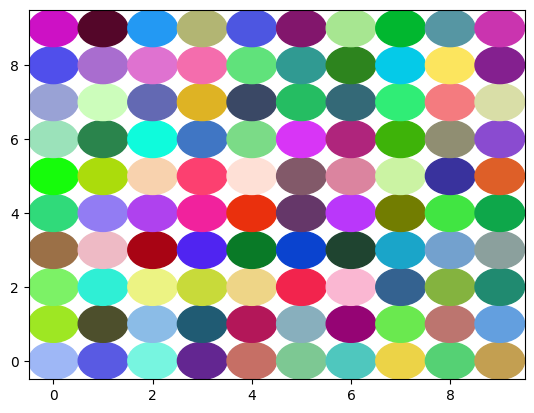

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.5, sigma=1.0, epochs=1000):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.epochs = epochs
        self.weights = np.random.rand(x_dim, y_dim, input_dim)
    
    def train(self, data):
        for epoch in range(self.epochs):
            for i in range(data.shape[0]):
                input_vector = data[i]
                bmu_index = self.find_bmu(input_vector)
                self.update_weights(input_vector, bmu_index, epoch)
    
    def find_bmu(self, input_vector):
        distances = np.linalg.norm(self.weights - input_vector, axis=2)
        bmu_index = np.unravel_index(np.argmin(distances, axis=None), distances.shape)
        return bmu_index
    
    def update_weights(self, input_vector, bmu_index, epoch):
        learning_rate = self.learning_rate * np.exp(-epoch / self.epochs)
        sigma = self.sigma * np.exp(-epoch / self.epochs)
        
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                neuron = np.array([x, y])
                bmu = np.array(bmu_index)
                distance_to_bmu = np.linalg.norm(neuron - bmu)
                
                if distance_to_bmu < sigma:
                    influence = np.exp(-(distance_to_bmu**2) / (2 * (sigma**2)))
                    self.weights[x, y] += learning_rate * influence * (input_vector - self.weights[x, y])
    
    def plot_weights(self):
        fig, ax = plt.subplots()
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                ax.add_patch(plt.Circle((x, y), radius=0.5, color=self.weights[x, y]))
        plt.xlim(-0.5, self.x_dim-0.5)
        plt.ylim(-0.5, self.y_dim-0.5)
        plt.show()

# Example usage:
data = np.random.rand(100, 3)  # 100 samples of 3-dimensional data
som = SOM(x_dim=10, y_dim=10, input_dim=3, learning_rate=0.5, sigma=1.0, epochs=100)
som.train(data)
som.plot_weights()


C:\Users\Bhanu Pratap Singh\AppData\Local\Temp\ipykernel_14712\3365388798.py:79: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x, y), 1, 1, color=cmap(color.mean()), edgecolor='black'))


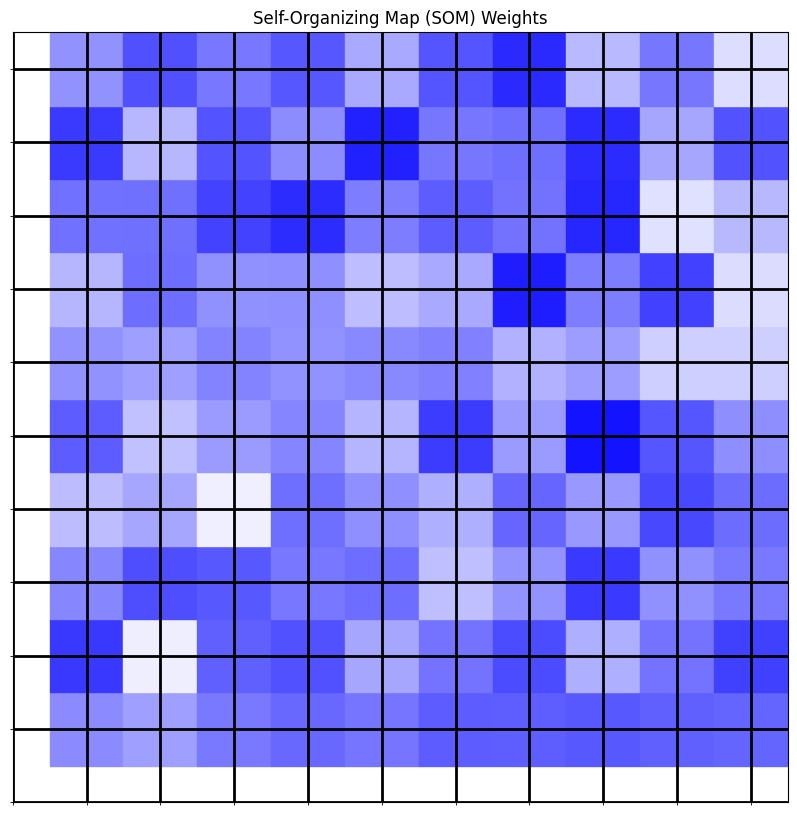

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

class SOM:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.5, sigma=1.0, epochs=1000):
        """
        Initialize the SOM parameters.
        
        :param x_dim: Number of neurons in the x dimension
        :param y_dim: Number of neurons in the y dimension
        :param input_dim: Dimension of the input data
        :param learning_rate: Initial learning rate
        :param sigma: Initial radius of the neighborhood function
        :param epochs: Number of training epochs
        """
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.epochs = epochs
        self.weights = np.random.rand(x_dim, y_dim, input_dim)
    
    def train(self, data):
        """
        Train the SOM with the provided data.
        
        :param data: The input data (numpy array of shape (n_samples, input_dim))
        """
        for epoch in range(self.epochs):
            np.random.shuffle(data)
            for input_vector in data:
                bmu_index = self.find_bmu(input_vector)
                self.update_weights(input_vector, bmu_index, epoch)
    
    def find_bmu(self, input_vector):
        """
        Find the Best Matching Unit (BMU) for the given input vector.
        
        :param input_vector: The input vector
        :return: Index of the BMU
        """
        distances = np.linalg.norm(self.weights - input_vector, axis=2)
        return np.unravel_index(np.argmin(distances, axis=None), distances.shape)
    
    def update_weights(self, input_vector, bmu_index, epoch):
        """
        Update the weights of the SOM neurons.
        
        :param input_vector: The input vector
        :param bmu_index: Index of the BMU
        :param epoch: Current training epoch
        """
        learning_rate = self.learning_rate * np.exp(-epoch / self.epochs)
        sigma = self.sigma * np.exp(-epoch / self.epochs)
        
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                neuron = np.array([x, y])
                bmu = np.array(bmu_index)
                distance_to_bmu = np.linalg.norm(neuron - bmu)
                
                if distance_to_bmu < sigma:
                    influence = np.exp(-(distance_to_bmu**2) / (2 * (sigma**2)))
                    self.weights[x, y] += learning_rate * influence * (input_vector - self.weights[x, y])
    
    def plot_weights(self):
        """
        Plot the SOM weight grid.
        """
        fig, ax = plt.subplots(figsize=(10, 10))
        cmap = LinearSegmentedColormap.from_list('weights', ['white', 'blue'])
        
        for x in range(self.x_dim):
            for y in range(self.y_dim):
                weight = self.weights[x, y]
                color = weight / np.max(self.weights)  # Normalize for visualization
                ax.add_patch(plt.Rectangle((x, y), 1, 1, color=cmap(color.mean()), edgecolor='black'))
        
        ax.set_xlim(0, self.x_dim)
        ax.set_ylim(0, self.y_dim)
        ax.set_xticks(np.arange(self.x_dim + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(self.y_dim + 1) - 0.5, minor=True)
        ax.grid(which="minor", color="k", linestyle='-', linewidth=2)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title('Self-Organizing Map (SOM) Weights')
        plt.show()

# Example usage:
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    data = np.random.rand(100, 3)  # 100 samples of 3-dimensional data
    som = SOM(x_dim=10, y_dim=10, input_dim=3, learning_rate=0.5, sigma=1.0, epochs=100)
    som.train(data)
    som.plot_weights()
